# Devoir 5, Question 4 : Réduction de dimensionnalité

# Homework 5, Question 4: Dimensionality reduction

## Code préambule

## Preamble code

In [1]:
import time
import numpy
import warnings
import pandas

# Nous ne voulons pas avoir ce type d'avertissement, qui
# n'est pas utile dans le cadre de ce devoir
# We do not want to have this type of warning, which
# is not useful in the context of this homework
warnings.filterwarnings("ignore", category=FutureWarning)

from matplotlib import pyplot, offsetbox
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

def plot_clustering(X_red, labels, title, savepath):
    # Tiré de https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html
    # Auteur : Gael Varoquaux
    # Distribué sous license BSD
    #
    # - X_red: array numpy contenant les caractéristiques (features)
    #   des données d'entrée, réduit à 2 dimensions / numpy array containing
    #   the features of the input data of the input data, reduced to 2 dimensions
    #
    # - labels: un array numpy contenant les étiquettes de chacun des
    #   éléments de X_red, dans le même ordre. / a numpy array containing the
    #   labels of each of the elements of X_red, in the same order.
    #
    # - title: le titre que vous souhaitez donner à la figure / the title you want
    #   to give to the figure
    #
    # - savepath: le nom du fichier où la figure doit être sauvegardée / the name
    #   of the file where the figure should be saved
    #
    x_min, x_max = numpy.min(X_red, axis=0), numpy.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    pyplot.figure(figsize=(9, 6), dpi=160)
    for i in range(X_red.shape[0]):
        pyplot.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                color=pyplot.cm.nipy_spectral(labels[i] / 10.),
                fontdict={'weight': 'bold', 'size': 9})

    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.title(title, size=17)
    pyplot.axis('off')
    pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
    pyplot.show()
    
X, y = load_digits(return_X_y=True)

À l'aide jeu de données *digits* (`datasets.load_digits()`), comparez différentes méthodes de réduction de dimensionnalité. Pour cette question, vous devez comparer trois méthodes :
- Analyse en composantes principales (*ACP*) (`decomposition.PCA`);
- Positionnement multidimensionnel (*MDS*) (`manifold.MDS`). Dans le cas de cette méthode, utilisez `n_init=1` pour minimiser le temps de calcul;
- t-SNE (`manifold.TSNE`).

Appliquez chacune de ces méthodes au jeu de données *digits* pour réduire sa dimensionnalité de
64 à 2, de façon à pouvoir l’afficher dans une figure. Une fonction nommée `plot_clustering` vous est fournie pour la création de la figure.

Pour chaque méthode, produisez les résultats suivants et discutez brièvement de ceux-ci:
- La visualisation 2D des résultats telle que produite par `plot_clustering`.
- Des images correspondant à quelques exemples de données appartenant à des classes différentes, mais néanmoins placées à proximité dans l’espace 2D (les données de *digits* sont des images de 8x8 pixels, que vous pouvez donc afficher).
- Pour chaque méthode et chaque classe du jeu de données, le ratio entre la distance euclidienne *intra-classe* (la distance moyenne entre tous les exemples d’une même classe, une fois la méthode de réduction de dimensionnalité appliquée) et la distance *inter-classe* (la distance moyenne entre les exemples d’une classe et tous les autres exemples n’étant pas de cette classe). Pour ce point, produisez également les résultats pour le jeu de données original à 64 dimensions. La fonction `scipy.spatial.distance.cdist`, de *SciPy*, pourrait vous être utile ici.

**Note** : la durée d’exécution n’est pas mesurée pour cette question puisque tous les algorithmes utilisés sont directement ceux de *scikit-learn*. Assurez-vous toutefois que votre script s’exécute en un temps raisonnable (moins de 3 minutes).

Using dataset *digits* (`datasets.load_digits()`), compare different dimensionality reduction methods. For this question, you need to compare three methods:
- Principal Component Analysis (*PCA*) (`decomposition.PCA`);
- Multidimensional scaling (*MDS*) (`manifold.MDS`). In the case of this method, use `n_init=1` to minimize the computation time;
- t-SNE (`manifold.TSNE`).

Apply each of these methods to the *digits* dataset to reduce its dimensionality from
64 to 2, so that it can be displayed in a figure. A function named `plot_clustering` is provided for creating the figure.

For each method, produce the following results and briefly discuss them:
- The 2D visualization of the results as produced by `plot_clustering`.
- Images corresponding to some examples of data belonging to different classes but nevertheless placed close together in 2D space (the *digits* data are 8x8 pixel images, so you can display them).
- For each method and each class in the dataset, the ratio of the Euclidean *intra-class* distance (the average distance between all examples of the same class, once the dimensionality reduction method has been applied) to the *inter-class* distance (the average distance between examples of a class and all other examples not in that class). For this point, also produce results for the original 64-dimensional dataset. The function `scipy.spatial.distance.cdist`, from *SciPy*, might be useful here.

**Note**: Runtime is not measured for this question since all the algorithms used are directly from *scikit-learn*. However, make sure your script runs in a reasonable time (less than 3 minutes).

## Q4A
Effectuez la démarche expliquée précédemment pour l'Analyse en composantes principales (PCA). Donnez votre réponse dans la cellule ici-bas.

## Q4A
Follow the procedure explained above for Principal Component Analysis (PCA). Provide your answer in the following cell.

In [2]:
def plot_image_boxes(X_red, images):      
    X_red = MinMaxScaler().fit_transform(X_red)

    fig = pyplot.figure(figsize=(9, 6), dpi=160)
    ax = fig.add_subplot(111)

    shown_images = numpy.array([[1.0, 1.0]])
    for i in range(X_red.shape[0]):
        ax.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                color=pyplot.cm.Dark2(y[i]), fontdict={'weight': 'bold', 'size': 9})

        dist = numpy.sum((X_red[i] - shown_images) ** 2, 1)
        if numpy.min(dist) < 4e-3:
            continue
        shown_images = numpy.concatenate([shown_images, [X_red[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[i], cmap=pyplot.cm.gray_r), X_red[i]
        )
        ax.add_artist(imagebox)

    ax.axis("off")

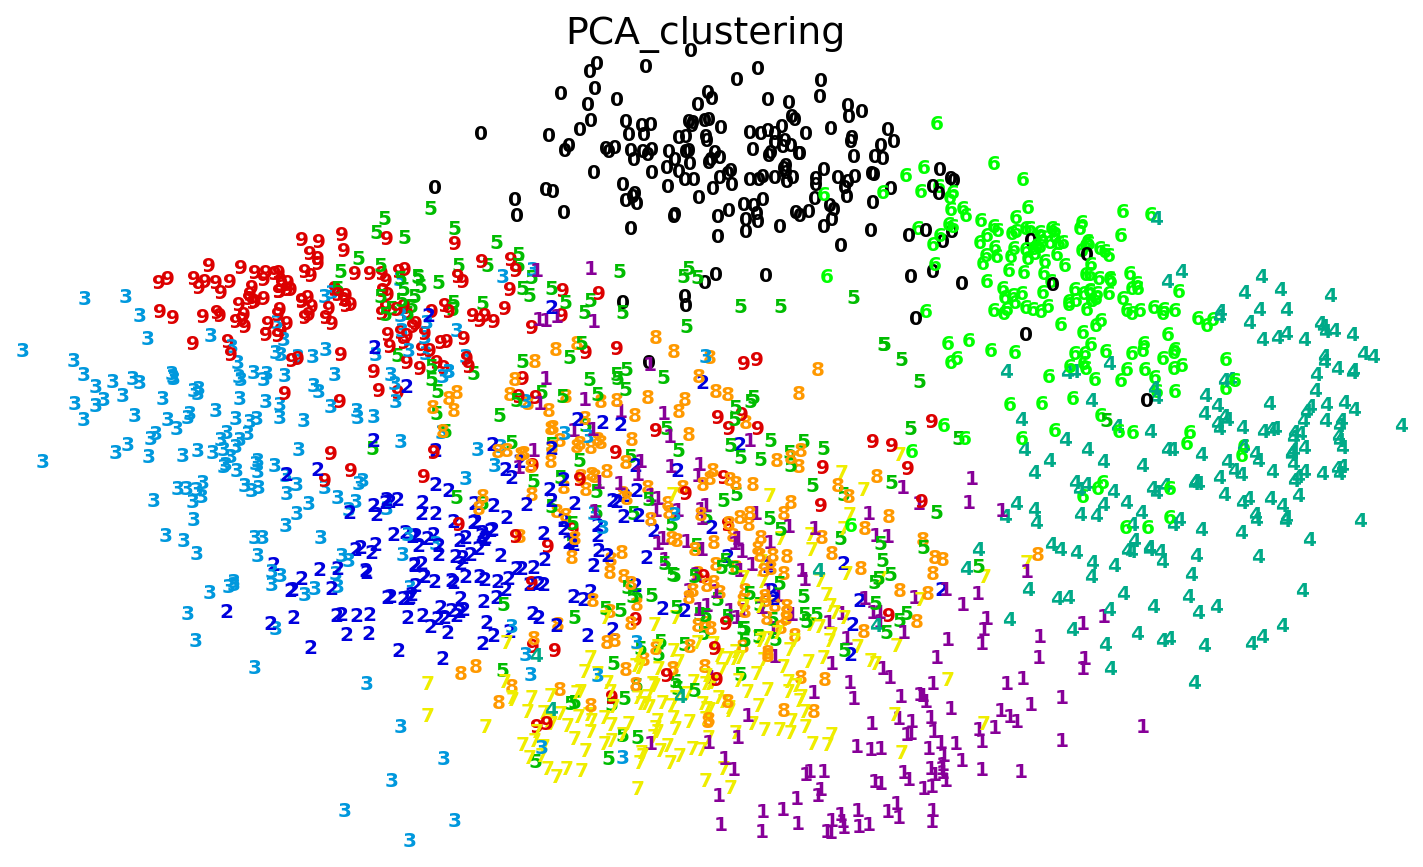

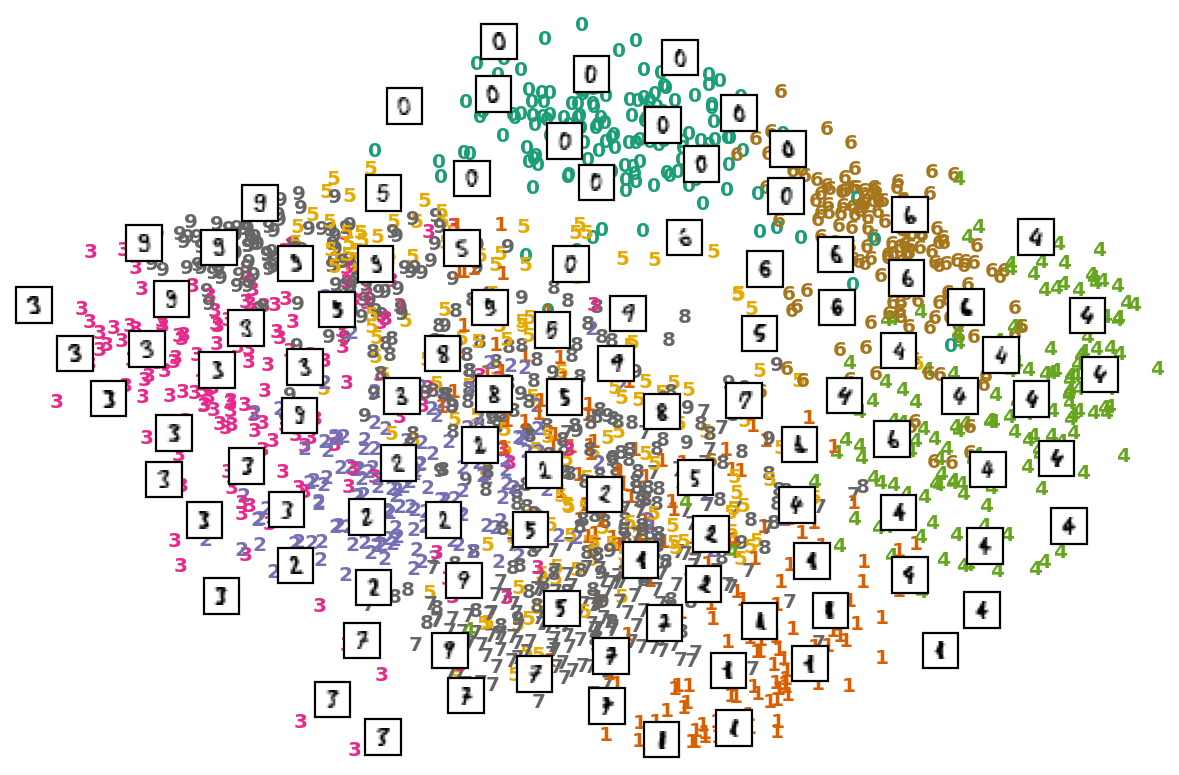

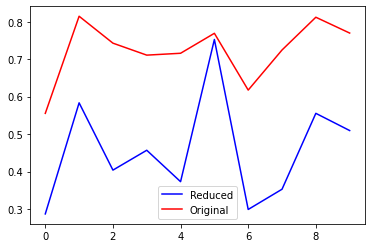

In [3]:
# *** TODO ***
# Application de l'analyse en composantes principales aux données digits.
# Visualisation 2D des résultats à l'aide de *plot_clustering*.
# Affichade d'images de quelques données appartenant à des classes différentes, mais proches dans l’espace 2D.
# Affichage du ratio entre la distance *intra-classe* et la distance *inter-classe*.
#
# Application of principal component analysis to digits dataset.
# 2D visualization of the results using *plot_clustering*.
# Display of images of some data belonging to different classes but close in 2D space.
# Display of the ratio between the *intra-class* distance and the *inter-class* distance.
# ******
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plot_clustering(X_reduced, y, "PCA_clustering", "/")
plot_image_boxes(X_reduced, load_digits().images)
pyplot.show()

reduced_ratios = []
original_ratios = []

def calculate_ratio(data, target, index): 
    X_A = data[numpy.where(target==i)]
    X_B = data[numpy.where(target!=i)] 
    return numpy.mean(cdist(X_A, X_A)) / numpy.mean(cdist(X_A, X_B))

for i in numpy.unique(y):
    reduced_ratios.append(calculate_ratio(X_reduced, y, i))
    original_ratios.append(calculate_ratio(X, y, i))

pyplot.plot(numpy.unique(y), reduced_ratios, color="blue", label="Reduced")
pyplot.plot(numpy.unique(y), original_ratios, color="red", label="Original")

pyplot.legend()
pyplot.show()

### Patron de code réponse à l'exercice Q4A

### Q4A answer code template

In [ ]:
# *** TODO ***
# Application de l'analyse en composantes principales aux données digits.
# Visualisation 2D des résultats à l'aide de *plot_clustering*.
# Affichade d'images de quelques données appartenant à des classes différentes, mais proches dans l’espace 2D.
# Affichage du ratio entre la distance *intra-classe* et la distance *inter-classe*.
#
# Application of principal component analysis to digits dataset.
# 2D visualization of the results using *plot_clustering*.
# Display of images of some data belonging to different classes but close in 2D space.
# Display of the ratio between the *intra-class* distance and the *inter-class* distance.
# ******

## Q4B
Effectuez la démarche expliquée précédemment pour le positionnement multidimensionnel (MDS). Donnez votre réponse dans la cellule ici-bas.

## Q4B
Follow the procedure explained above for Multidimensional Scaling (MDS). Provide your answer in the following cell.

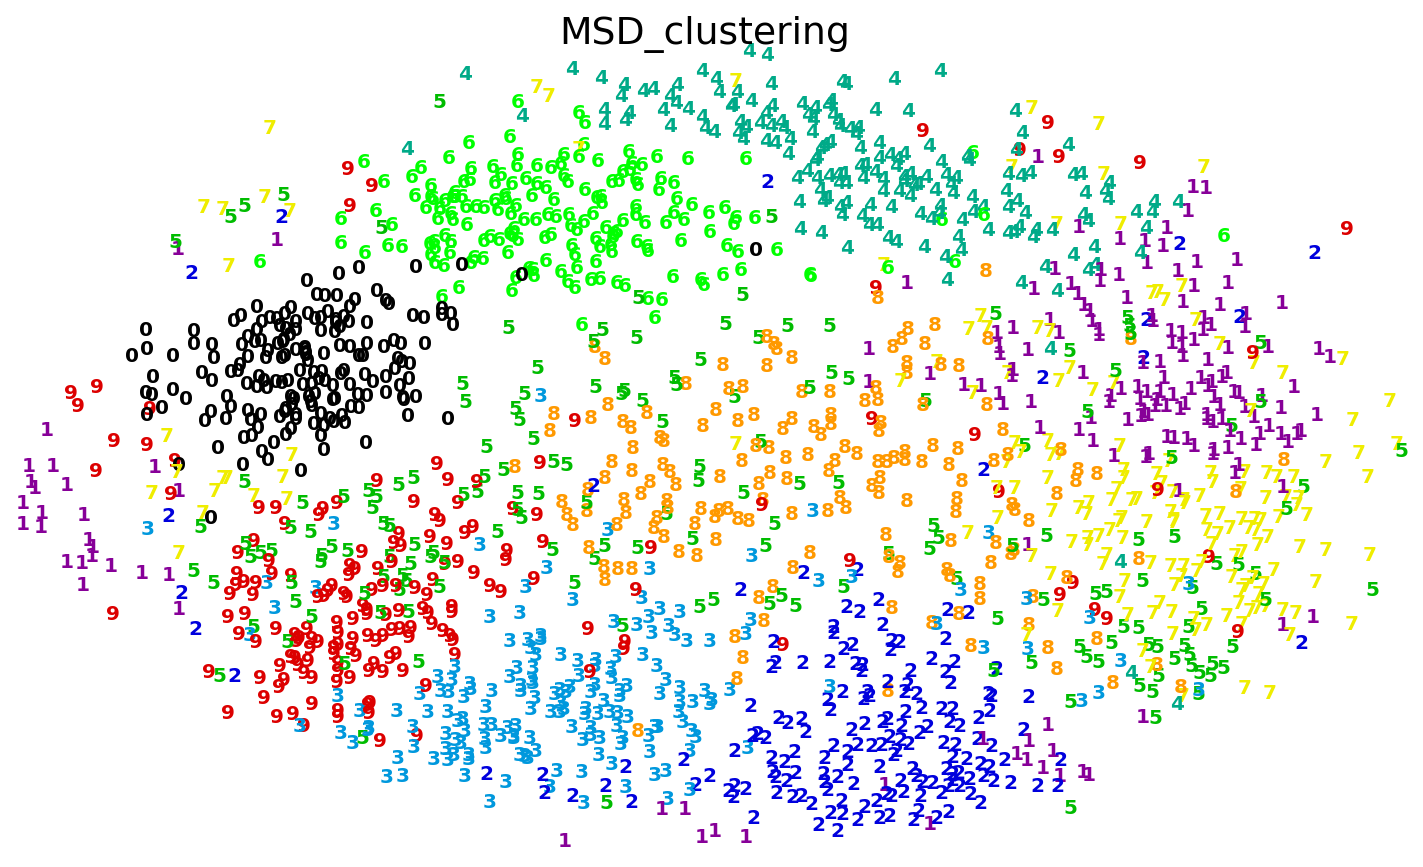

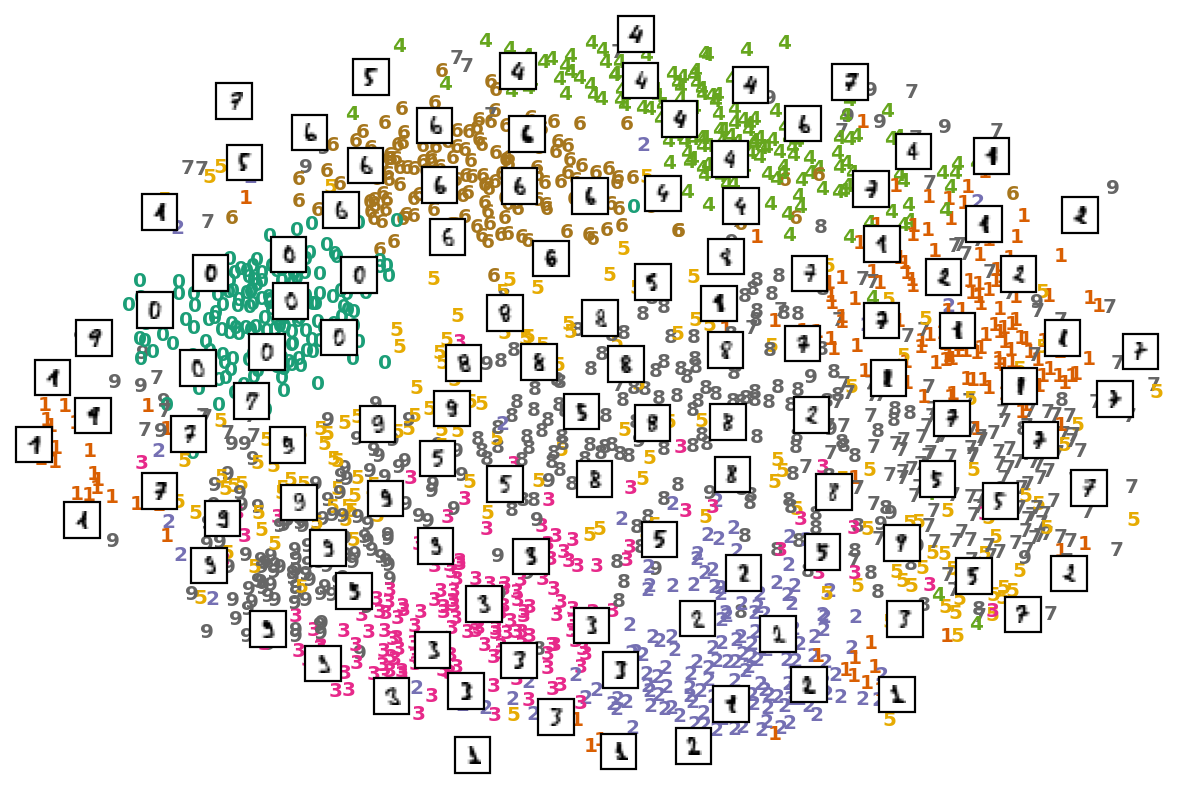

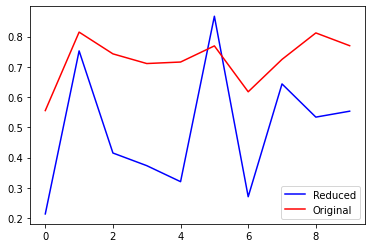

In [11]:
# *** TODO ***
# Application du positionnement multidimensionnel aux données digits.
# Visualisation 2D des résultats à l'aide de *plot_clustering*.
# Affichade d'images de quelques données appartenant à des classes différentes, mais proches dans l’espace 2D.
# Affichage du ratio entre la distance *intra-classe* et la distance *inter-classe*.
#
# Application of multidimensional scaling to digits dataset.
# 2D visualization of the results using *plot_clustering*.
# Display of images of some data belonging to different classes but close in 2D space.
# Display of the ratio between the *intra-class* distance and the *inter-class* distance.
# ******

mds = MDS(n_init=1, n_components=2)
X_reduced = mds.fit_transform(X)
plot_clustering(X_reduced, y, "MSD_clustering", "/")
plot_image_boxes(X_reduced, load_digits().images)
pyplot.show()

reduced_ratios = []
original_ratios = []

def calculate_ratio(data, target, index): 
    X_A = data[numpy.where(target==i)]
    X_B = data[numpy.where(target!=i)] 
    return numpy.mean(cdist(X_A, X_A)) / numpy.mean(cdist(X_A, X_B))

for i in numpy.unique(y):
    reduced_ratios.append(calculate_ratio(X_reduced, y, i))
    original_ratios.append(calculate_ratio(X, y, i))

pyplot.plot(numpy.unique(y), reduced_ratios, color="blue", label="Reduced")
pyplot.plot(numpy.unique(y), original_ratios, color="red", label="Original")

pyplot.legend()
pyplot.show()


### Patron de code réponse à l'exercice Q4B

### Q4B answer code template

In [ ]:
# *** TODO ***
# Application du positionnement multidimensionnel aux données digits.
# Visualisation 2D des résultats à l'aide de *plot_clustering*.
# Affichade d'images de quelques données appartenant à des classes différentes, mais proches dans l’espace 2D.
# Affichage du ratio entre la distance *intra-classe* et la distance *inter-classe*.
#
# Application of multidimensional scaling to digits dataset.
# 2D visualization of the results using *plot_clustering*.
# Display of images of some data belonging to different classes but close in 2D space.
# Display of the ratio between the *intra-class* distance and the *inter-class* distance.
# ******

## Q4C
Effectuez la démarche expliquée précédemment pour t-SNE. Donnez votre réponse dans la cellule ici-bas.

## Q4B
Follow the procedure explained above for t-SNE. Provide your answer in the following cell.

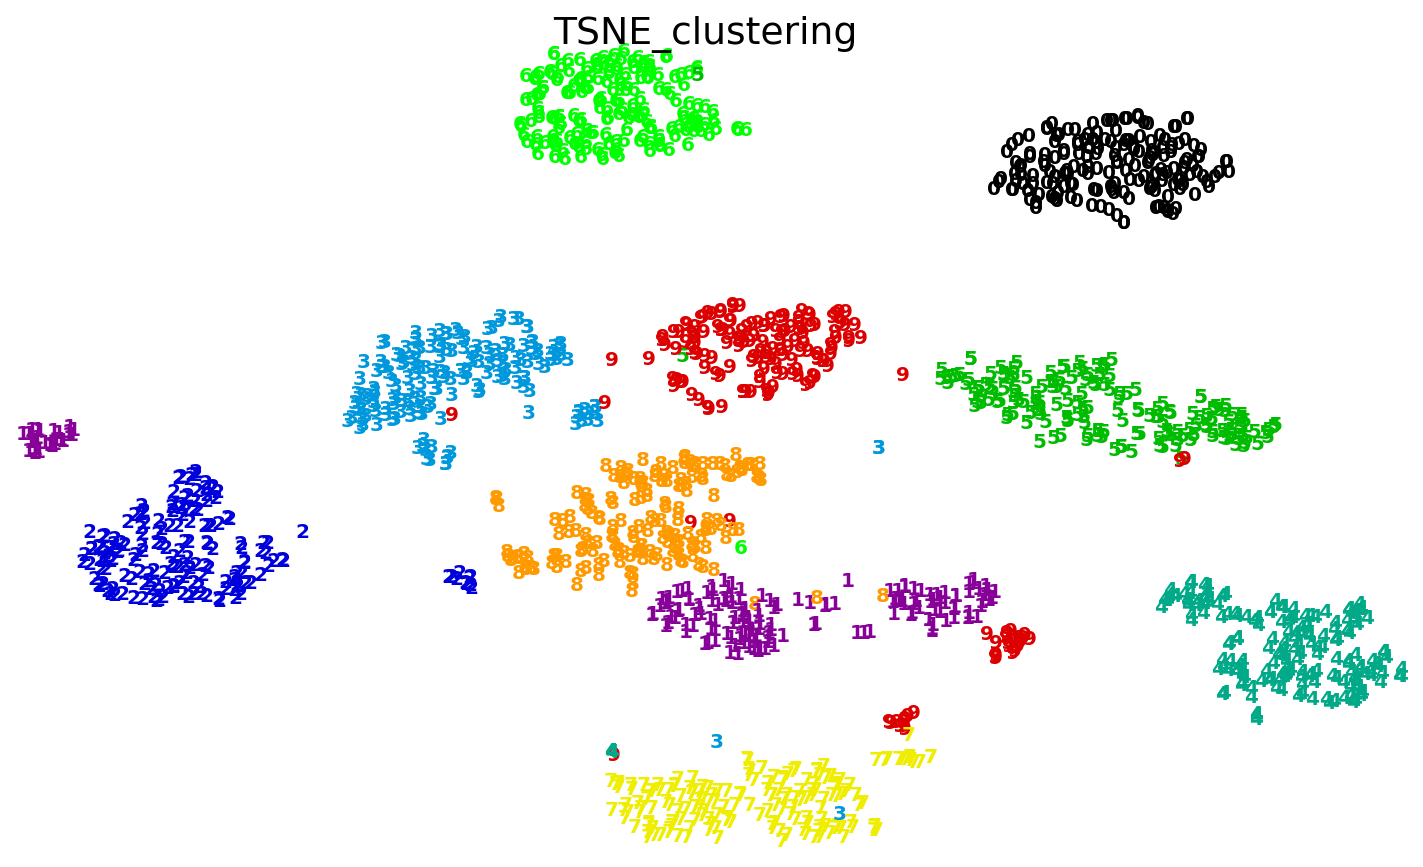

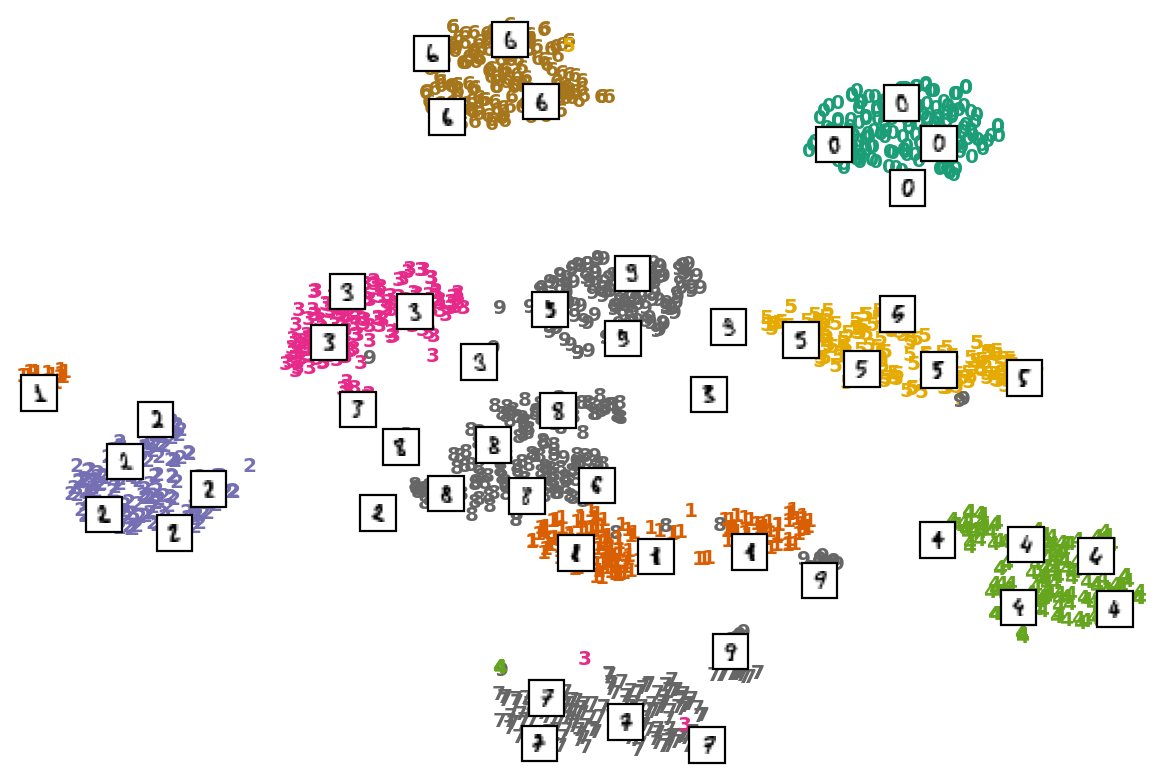

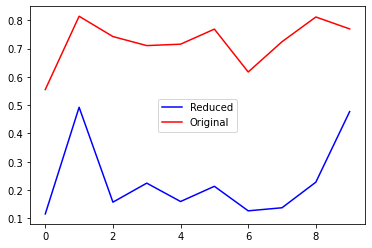

In [12]:
# *** TODO ***
# Application de t-SNE aux données digits.
# Visualisation 2D des résultats à l'aide de *plot_clustering*.
# Affichade d'images de quelques données appartenant à des classes différentes, mais proches dans l’espace 2D.
# Affichage du ratio entre la distance *intra-classe* et la distance *inter-classe*.
#
# Application of t-SNE to digits dataset.
# 2D visualization of the results using *plot_clustering*.
# Display of images of some data belonging to different classes but close in 2D space.
# Display of the ratio between the *intra-class* distance and the *inter-class* distance.
# ******

tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)
plot_clustering(X_reduced, y, "TSNE_clustering", "/")
plot_image_boxes(X_reduced, load_digits().images)
pyplot.show()

reduced_ratios = []
original_ratios = []

def calculate_ratio(data, target, index): 
    X_A = data[numpy.where(target==i)]
    X_B = data[numpy.where(target!=i)] 
    return numpy.mean(cdist(X_A, X_A)) / numpy.mean(cdist(X_A, X_B))

for i in numpy.unique(y):
    reduced_ratios.append(calculate_ratio(X_reduced, y, i))
    original_ratios.append(calculate_ratio(X, y, i))

pyplot.plot(numpy.unique(y), reduced_ratios, color="blue", label="Reduced")
pyplot.plot(numpy.unique(y), original_ratios, color="red", label="Original")

pyplot.legend()
pyplot.show()

### Patron de code réponse à l'exercice Q4C

### Q4C answer code template

In [ ]:
# *** TODO ***
# Application de t-SNE aux données digits.
# Visualisation 2D des résultats à l'aide de *plot_clustering*.
# Affichade d'images de quelques données appartenant à des classes différentes, mais proches dans l’espace 2D.
# Affichage du ratio entre la distance *intra-classe* et la distance *inter-classe*.
#
# Application of t-SNE to digits dataset.
# 2D visualization of the results using *plot_clustering*.
# Display of images of some data belonging to different classes but close in 2D space.
# Display of the ratio between the *intra-class* distance and the *inter-class* distance.
# ******